# [*Lab Project Part 2*]() CNNs for Image Classification
------------------------------

### General Guideline
1. Aim:
    - *Understand  the  basic  Image  Classification/Recognition  pipeline  and  the  data-driven  approach (train/predict stages).*
    - *Get used to one of deep learning frameworks (e.g. PyTorch).*
2. Prerequisite:
    - *Familiar with python and relevant packages.*
    - *Known the basic knowledge of Convolutional Neural Networks*

### PyTorch versions
we assume that you are using latest PyTorch version(>=1.4)

### PyTorch Tutorial & Docs
You can learn pytorch from the [tutorial link](https://pytorch.org/tutorials/). The Docs information can be searched at [Docs](https://pytorch.org/docs/stable/index.html). In this assignments, we wish you to form the basic capability of using one of the well-known frameworks for deep learning tasks.  

## Session 1: Image Classifiation on CIFAR 10
### Install pytorch and run the given codes

In [1]:
#####################################################
# referenced codes: https://pytorch.org/tutorials/
# referenced codes: http://cs231n.stanford.edu/
# referenced codes: https://cs.stanford.edu/~acoates/stl10/
######################################################
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim


In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


####  *` Q2.1: test dataloader and show the images of each class  of CIFAR10`*  

0 : plane


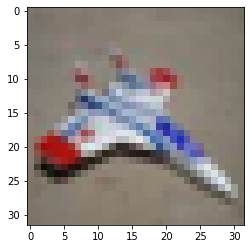

1 : car


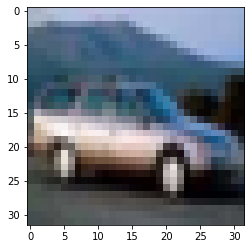

2 : bird


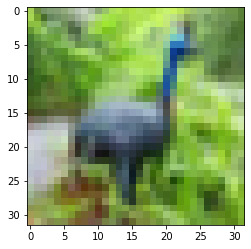

3 : cat


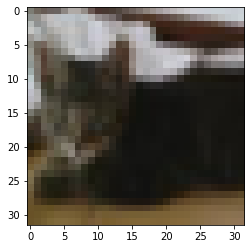

4 : deer


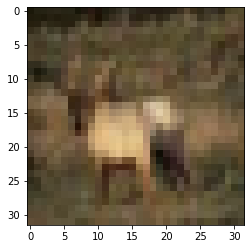

5 : dog


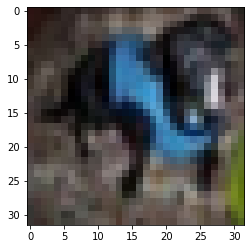

6 : frog


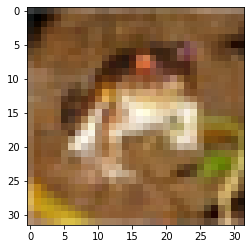

7 : horse


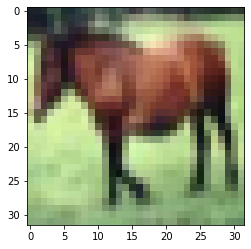

8 ship


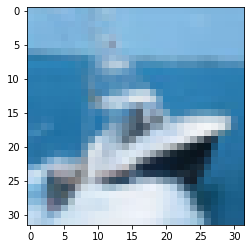

9 : truck


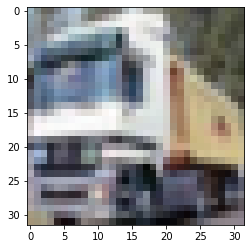

In [3]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


print(trainset[30][1], ': plane')
imshow(trainset[30][0])

print(trainset[4][1], ': car')
imshow(trainset[4][0])

print(trainset[6][1], ': bird')
imshow(trainset[6][0])

print(trainset[9][1], ': cat')
imshow(trainset[9][0])

print(trainset[3][1], ': deer')
imshow(trainset[3][0])

print(trainset[27][1], ': dog')
imshow(trainset[27][0])

print(trainset[0][1], ': frog')
imshow(trainset[0][0])

print(trainset[7][1], ': horse')
imshow(trainset[7][0])

print(trainset[8][1], 'ship')
imshow(trainset[8][0])

print(trainset[1][1], ': truck')
imshow(trainset[1][0])

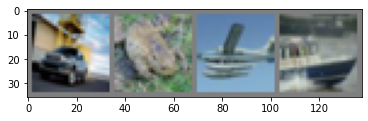

  car  frog plane  ship


In [4]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

####  *` Q2.2: Architecture understanding. Implement architecture of TwolayerNet and ConvNet.`*  

In [5]:
class TwolayerNet(nn.Module):
    # assign layer objects to class attributes
    # nn.init package contains convenient initialization methods
    # http://pytorch.org/docs/master/nn.html#torch-nn-init
    def __init__(self, input_size, hidden_size, num_classes):
        '''
        :param input_size: 3*32*32
        :param hidden_size: decide by yourself e.g. 1024, 512, 128 ...
        :param num_classes: 
        '''
        ################################
        # Todo: finish the code
        ################################
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        # flatten
        x = x.view(x.shape[0], -1)
        scores = self.fc2(F.relu(self.fc1(x)))
        return scores

model = TwolayerNet(3*32*32, 512, 10)

In [50]:
class ConvNet(nn.Module):
    # Complete the code using LeNet-5
    # reference: https://ieeexplore.ieee.org/document/726791
    def __init__(self):
        ################################
        # Todo: finish the code
        ################################
        super().__init__()
        self.feature_extractor = nn.Sequential(  
            nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1),
            nn.LeakyReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),
            nn.LeakyReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.classifier = nn.Sequential(
                nn.Linear(in_features=400, out_features=120),
                nn.LeakyReLU(),
                nn.Linear(in_features=120, out_features=84),
                nn.LeakyReLU(),
                nn.Linear(in_features=84, out_features=10)
            )

    def forward(self, x):
        ################################
        # Todo: finish the code
        ################################
        x = self.feature_extractor(x)
        x = torch.flatten(x, 1)
        log = self.classifier(x)
        return log

In [45]:
## exmample. You can change and modify it if you like.
## use the above defined trainloader directly and train the models 
def train(net, trainloader, epoch=1):
    ###################### Define Loss function and optimizer
    loss_function = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(net.parameters(), lr=1e-4)
    ############################### Training
    for epoch in range(epoch):  # loop over the dataset multiple times 

        ################################
        # Todo: finish the code
        ################################
        for x, y in trainloader:
            
            y_pred = net(x)
            loss = loss_function(y_pred, y)
        
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    
    print('Finished Training')
    
    if 'T' == str(net)[0]:
        torch.save(net.state_dict(), './twolayernet.pth')
    if 'C' == str(net)[0]:
        torch.save(net.state_dict(), './convnet.pth')

####  Train Two-layer Net

In [53]:
################################
# Todo: finish the code
################################
model = TwolayerNet(3*32*32, 512, 10)
train(model, trainloader, epoch=1)
outputs = model(images)

cor = 0
tot = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        tot += labels.size(0)
        cor += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * cor / tot))

Finished Training
Accuracy of the network on the 10000 test images: 34 %


#### Train ConvNet - LeNet-5

In [52]:
################################
# Todo: finish the code
################################
model = ConvNet()
train(model, trainloader, epoch=1)
outputs = model(images)

cor = 0
tot = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        tot += labels.size(0)
        cor += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * cor / tot))

Finished Training
Accuracy of the network on the 10000 test images: 13 %


In [14]:
def valid(net, testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (
            100 * correct / total))

In [15]:
def valid_class(net,testloader,classes):
    class_correct = list(0. for i in range(len(classes)))
    class_total = list(0. for i in range(len(classes)))
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            for i in range(4):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1

    for i in range(len(classes)):
        print('Accuracy of %5s : %2d %%' % (
            classes[i], 100 * class_correct[i] / class_total[i]))

####  *` Q2.3: Preparation of training. Create Dataloader yourself and define Transform, optimizer.`*  

#### *` Complement  CIFAR10_loader()`*

In [16]:
###  suggested reference: https://pytorch.org/tutorials/recipes/recipes/custom_dataset_transforms_loader.html?highlight=dataloader
# functions to show an image
import os 
from torch.utils.data import Dataset
import pickle

class CIFAR10_loader(Dataset):
    def __init__(self, root, train=True, transform = None):
        self.root = root
        self.train = train
        self.transform = transform
        
    def unpickle(self, file):
        with open(self.root+file, 'rb') as fo:
            dict1 = pickle.load(fo, encoding='bytes')
        return dict1
    
    def load(self):
        train_files = []
        test_files = []
        
        labels = []
        data = []
        filenames = []
        for x in os.walk(self.root):
            for file in x[2]:
                if 'data_batch_' in file:
                    train_files.append(file)
                if 'test_batch' in file:
                    test_files.append(file)
            
        if train:
            for f in train_files:
                load = self.unpickle(f)
                labels.append(load[b'labels'])
                data.append(load[b'data'])
                filenames.append(load[b'filenames'])
                
        else:
            for f in test_files:
                load = self.unpickle(f)
                labels.append(load[b'labels'])
                data.append(load[b'data'])
                filenames.append(load[b'filenames'])
        return labels, data, filenames
        
    def __len__(self):
        return len(self.data)

    def __getitem__(self, item):
        labels, data, filenames = self.load()
        self.img = data[item]
        self.targer = labels[item]
        
        if torch.is_tensor(item):
            item = item.tolist()
        
        return self.img, self.target

#### *` Complement Transform function and Optimizer`*

In [17]:
transform_train = CIFAR10_loader('data/cifar-10-batches-py')
transform_test = CIFAR10_loader('data/cifar-10-batches-py', train=False)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)

#### *` Train the ConvNet with CIFAR10_loader, transform and optimizer you implemented and compare the results`*

In [18]:
def train(net, transform_train, epoch=1):
    ###################### Define Loss function and optimizer
    loss_function = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(net.parameters(), lr=1e-4)
    ############################### Training
    for epoch in range(epoch):  # loop over the dataset multiple times 

        ################################
        # Todo: finish the code
        ################################
        for x, y in trainloader:
            
            y_pred = net(x)
            loss = loss_function(y_pred, y)
        
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    
    print('Finished Training')
    
    if 'T' == str(net)[0]:
        torch.save(net.state_dict(), './twolayernet.pth')
    if 'C' == str(net)[0]:
        torch.save(net.state_dict(), './convnet.pth')

#### *` Q2.4 Setting up the hyperparameters.`*

#### *`Play with convNet and TwolayerNet, set up the hyperparameters and reach the accuracy as high as you can`*

In [25]:
################################
# Todo: finish the code
################################
model_twolayernet = TwolayerNet(3*32*32, 512, 10)
train(model_twolayernet, transform_train, epoch=3)

Finished Training


In [26]:
model_convnet = ConvNet()
train(model_convnet, transform_train, epoch=3)

Finished Training


#### *` test the accuracy of ConvNet `*

In [27]:
################################
# Todo: finish the code
################################
model_convnet = ConvNet()
outputs = model_convnet(images)

cor = 0
tot = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model_convnet(images)
        _, predicted = torch.max(outputs.data, 1)
        tot += labels.size(0)
        cor += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * cor / tot))

Accuracy of the network on the 10000 test images: 12 %


#### *`test the accuracy of TwolayerNet`*

In [28]:
################################
# Todo: finish the code
################################
model_twolayernet = TwolayerNet(3*32*32, 512, 10)
outputs = model_twolayernet(images)

cor = 0
tot = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model_twolayernet(images)
        _, predicted = torch.max(outputs.data, 1)
        tot += labels.size(0)
        cor += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * cor / tot))

Accuracy of the network on the 10000 test images: 8 %


## Session 2:  Finetuning the ConvNet
### STL-10 DATASET
> The provided network is trained on a different dataset named CIFAR-10 , which
contains the images of 10 different object categories. The dataset we use throughout the assignment is a subset of STL-10 
with larger sizes and different object classes. So, there is a discrepancy between the
dataset we use to train (CIFAR-10) and test (STL-10) our network. One solution
would be to train the whole network from scratch. However, the number of param-
eters are too large to be trained properly with such few number of images provided.
One solution is to shift the learned weights in a way to perform well on the test
set, while preserving as much information as necessary from the training class.
### In this Session, extract 5 classes from STL training dataset , 
the the label of images can be defined as `{1: 'airplanes',2:'birds',3:'ships',4:'cats',5:'dogs'}`

#### *`Q3.1 create the STL10_Dataset `*

In [30]:
# from stl10_data import *
class STL10_Dataset(Dataset):
    def __init__(self, root, train=True, transform = None):
        ################################
        # Todo: finish the code
        ################################
        self.root = root
        self.train = train
        self.transform = transform

        def unpickle(self, file):
            with open(self.root+file, 'rb') as fo:
                dict1 = pickle.load(fo, encoding='bytes')
            return dict1
        
        def load(self):
            train_files = []
            test_files = []
            
            labels = []
            data = []
            filenames = []
            for x in os.walk(self.root):
                for file in x[2]:
                    if 'data_batch_' in file:
                        train_files.append(file)
                    if 'test_batch' in file:
                        test_files.append(file)
                
            if train:
                for f in train_files:
                    load = self.unpickle(f)
                    labels.append(load[b'labels'])
                    data.append(load[b'data'])
                    filenames.append(load[b'filenames'])
                    
            else:
                for f in test_files:
                    load = self.unpickle(f)
                    labels.append(load[b'labels'])
                    data.append(load[b'data'])
                    filenames.append(load[b'filenames'])
            return labels, data, filenames
 

    def __len__(self):
        ################################
        # Todo: finish the code
        ################################
        return len(self.data)
        
    def __getitem__(self, item):
        ################################
        # Todo: finish the code
        ################################
        labels, data, filenames = self.load()
        self.img = data[item]
        self.targer = labels[item]
        
        if torch.is_tensor(item):
            item = item.tolist()
        
        return self.img, self.target


#### *`Q3.2  Finetuning from ConvNet & train the model and show the results`*

In [31]:
################################
# Todo: finish the code
################################
model_convnet = ConvNet()
train(model_convnet, transform_train, epoch=3)

model_convnet = ConvNet()
outputs = model_convnet(images)

cor = 0
tot = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model_convnet(images)
        _, predicted = torch.max(outputs.data, 1)
        tot += labels.size(0)
        cor += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * cor / tot))

Finished Training
Accuracy of the network on the 10000 test images: 10 %


###  `Bonus`

In [52]:
pass